In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import tensorflow as tf

In [3]:
v = np.array([1,2])

In [12]:
def plot_vectors(points,colors):
    plt.figure()
    plt.axvline(x=0,color = 'lightgray')
    plt.axhline(y=0,color = 'lightgray')
    for i in range(len(points)):
        x = np.concatenate([[0,0],points[i]])
        plt.quiver(x[0],x[1],x[2],x[3],color = colors[i],angles = 'xy',scale_units = 'xy',scale=1)
        
        

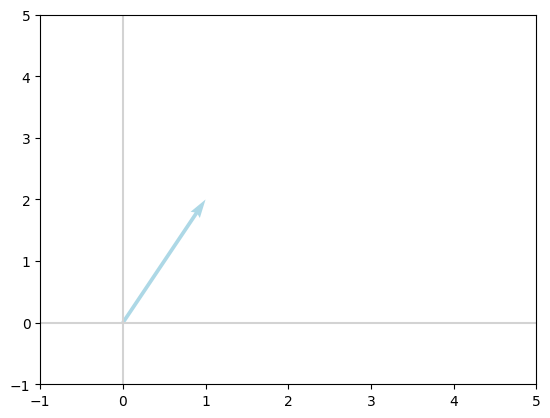

In [13]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In [19]:
Q = np.array([[0,-1],[1,0]])

In [20]:
Qv = np.dot(I,v)

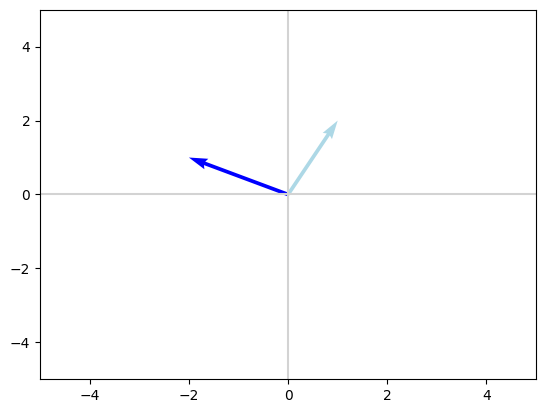

In [21]:
plot_vectors([v,Qv],['lightblue','blue'])
plt.xlim(-5,5)
_=plt.ylim(-5,5)

In [22]:
QT = Q.T

In [23]:
QTv = np.dot(QT,v)

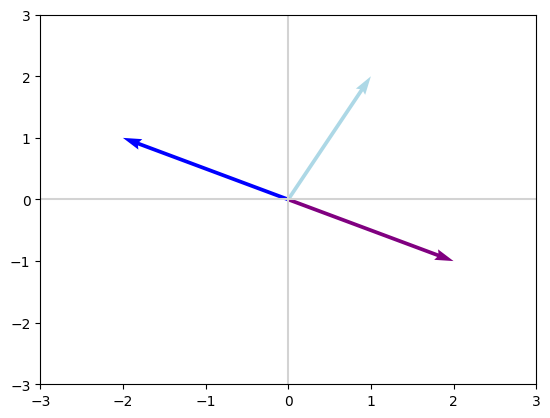

In [26]:
plot_vectors([v,Qv,QTv],['lightblue','blue','purple'])
plt.xlim(-3,3)
_=plt.ylim(-3,3)

Eigen Values and Eigen Vectors:
Eigen vector of a matrix is the vector which doesn't flip off the axis it depends on after a matrix is multiplied to it
Lets say a reflecting vector: the picture is flipped along the y-axis, both the vectors along the axis would be eigen vectors
whereas when there is a shear effect on a picture, vector on y-axis knocks off the axis, so only the other vector is a eigen vector.

Eigen Values are scalar values that tells us how much the eigen vector has expanded or contracted on applying a matrix to the eigen vector.
Eigen values can also a -ve sign. 

"Av = lambda.v"
where lambda is the eigen value
v is the eigen vector
A is the matrix

In [29]:
A = np.array([[1,2],[3,4]])

In [30]:
lambdas,V = np.linalg.eig(A)

In [31]:
V

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

In [32]:
lambdas

array([-0.37228132,  5.37228132])

In [38]:
v1 = V[:,0]
lambduh = lambdas[0]
Av = np.dot(A,v1)
Av

array([ 0.30697009, -0.21062466])

In [39]:
lambduh*v1

array([ 0.30697009, -0.21062466])

In [40]:
Av == (lambduh*v1)

array([ True, False])

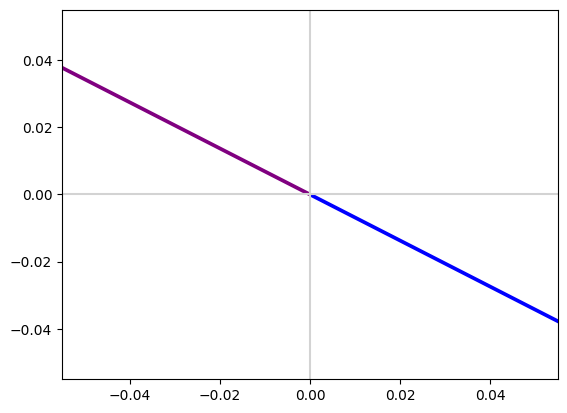

In [42]:
plot_vectors([Av,v1],['blue','purple'])

In [43]:
v2 = V[:,1]
v2

array([-0.41597356, -0.90937671])

In [45]:
lambduh = lambdas[1]

In [48]:
Av2 = np.dot(A,v2)
Av2

array([-2.23472698, -4.88542751])

In [47]:
lambduh*v2

array([-2.23472698, -4.88542751])

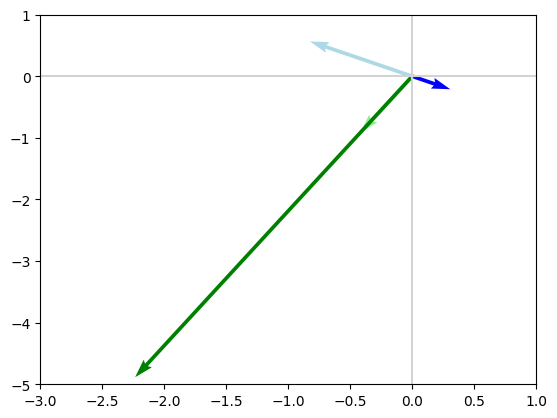

In [56]:
plot_vectors([v1,v2,Av,Av2],['lightblue','lightgreen','blue','green'])
plt.xlim(-3,1)
_=plt.ylim(-5,1)

PyTorch:

In [62]:
A = torch.tensor([[1,2],[3,4.]])

In [70]:
V = torch.linalg.eig(A)
V

torch.return_types.linalg_eig(
eigenvalues=tensor([-0.3723+0.j,  5.3723+0.j]),
eigenvectors=tensor([[-0.8246+0.j, -0.4160+0.j],
        [ 0.5658+0.j, -0.9094+0.j]]))

In [72]:
v1 = V.eigenvectors[:,0]
v1 = v1.real
v1

tensor([-0.8246,  0.5658])

In [73]:
v2 = V.eigenvectors[:,1]
v2 = v2.real

In [74]:
lambda1,lambda2 = V.eigenvalues[0],V.eigenvalues[1]

In [75]:
Av1 = torch.matmul(A,v1)
Av1

tensor([ 0.3070, -0.2106])

In [77]:
(lambda1*v1).real

tensor([ 0.3070, -0.2106])

Determinants:

Map a square matrix to a single scalar value
Enable us to determine whether a matrix can be inverted
1. If det((X) = 0, then Inverse(X) cannot be computed--> Matrix X is singular, contains linearly dependent columns

In [79]:
np.linalg.det(A.numpy())

-2.0

In [80]:
torch.linalg.det(A)

tensor(-2.)

Determinants and Eigen Values:

1. det(X) = product of all the eigen values of X
2. abs(det(X))= 0, this means that applying X to a tensor collapses it to a single dimension, thereby eliminating the volume.
3. 0<abs(det(X)) <1, this means that applying x to a tensor reduced the volume of the tensor
4. abs(det(x))=1, this retains the volume of the tensor
5. abs(det(x))>1, this expands the volume of the tensor applied to it


In [81]:
A

tensor([[1., 2.],
        [3., 4.]])

In [88]:
torch.prod(torch.linalg.eig(A).eigenvalues).real

tensor(-2.0000)

In [94]:
A_np = np.array([[4,1],[8,2]])

In [101]:
AA = np.dot(A_np,A.numpy())
AA

array([[ 7., 12.],
       [14., 24.]])

In [91]:
v_np = np.array([1,2])

In [92]:
Av_np = np.dot(A_np,v_np)
Av_np

array([1, 2])

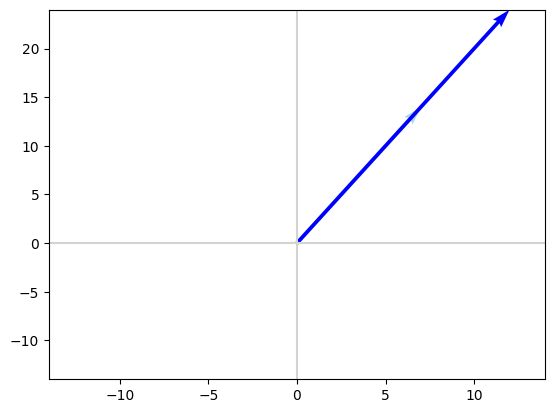

In [105]:
plot_vectors([AA[:,0],AA[:,1]],['lightblue','blue'])
plt.xlim(-14,14)
_=plt.ylim(-14,24)

Eigen Value Decomposition:


In [110]:
lambdas,V = np.linalg.eig([[2,1],[1,2]])
lambdas

array([3., 1.])

In [111]:
V

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [108]:
A = [[2,0,0],[0,3,4],[0,4,9]]
v1 = V[:,0]
np.dot(A,v1)

array([0.        , 4.91934955, 9.8386991 ])

In [109]:
lambdas[0]*v1

array([0.        , 4.91934955, 9.8386991 ])

Singular Value Decomposition (SVD):

In [112]:
A = np.array([[1,0],[1,1],[0,1]])

In [131]:
U, D, VT = np.linalg.svd(A)

In [132]:
U.real

array([[-4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
       [-8.16496581e-01, -1.22629285e-16, -5.77350269e-01],
       [-4.08248290e-01, -7.07106781e-01,  5.77350269e-01]])

In [133]:
D

array([1.73205081, 1.        ])

In [134]:
D = np.diag(D)
D

array([[1.73205081, 0.        ],
       [0.        , 1.        ]])

In [135]:
D = np.linalg.inv(D)
D

array([[0.57735027, 0.        ],
       [0.        , 1.        ]])

In [123]:
D = np.concatenate((D,[[0,0]]),axis=0)
D

array([[1.73205081, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

In [137]:
A_pt = torch.tensor([[1,0],[1,1],[0,1.]])

In [139]:
Upt, Dpt, VTpt = torch.linalg.svd(A_pt)

In [140]:
Upt

tensor([[-4.0825e-01,  7.0711e-01,  5.7735e-01],
        [-8.1650e-01,  2.9802e-08, -5.7735e-01],
        [-4.0825e-01, -7.0711e-01,  5.7735e-01]])

In [141]:
Dpt

tensor([1.7321, 1.0000])

In [142]:
VTpt

tensor([[-0.7071, -0.7071],
        [ 0.7071, -0.7071]])

In [147]:
AATpt = torch.matmul(A_pt,A_pt.T)
AATpt

tensor([[1., 1., 0.],
        [1., 2., 1.],
        [0., 1., 1.]])

In [148]:
res = torch.linalg.eig(AATpt)
res

torch.return_types.linalg_eig(
eigenvalues=tensor([3.0000e+00+0.j, 1.0000e+00+0.j, 9.4259e-08+0.j]),
eigenvectors=tensor([[-4.0825e-01+0.j,  7.0711e-01+0.j,  5.7735e-01+0.j],
        [-8.1650e-01+0.j,  1.1968e-07+0.j, -5.7735e-01+0.j],
        [-4.0825e-01+0.j, -7.0711e-01+0.j,  5.7735e-01+0.j]]))

In [150]:
eigval = res.eigenvalues
eigvec = res.eigenvectors
eigvec.real

tensor([[-4.0825e-01,  7.0711e-01,  5.7735e-01],
        [-8.1650e-01,  1.1968e-07, -5.7735e-01],
        [-4.0825e-01, -7.0711e-01,  5.7735e-01]])

In [152]:
ATApt = torch.matmul(A_pt.T,A_pt)
ATApt

tensor([[2., 1.],
        [1., 2.]])

In [153]:
eigenvalues,eigenvectors = torch.linalg.eig(ATApt)

In [154]:
eigenvectors.real

tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])

In [155]:
torch.linalg.norm(AATpt)

tensor(3.1623)

Singular Value Decomposition Image Reconstruction:

In [163]:
from PIL import Image
from matplotlib import *
from pylab import *
image = Image.open('Img_3446.jpg')

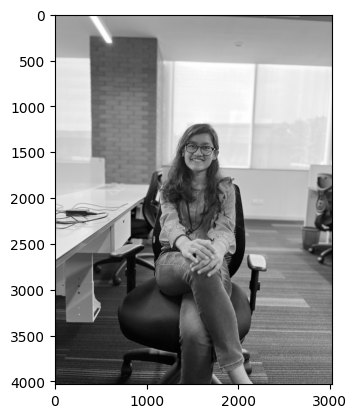

In [164]:
imggray = image.convert('LA')
_plt = imshow(imggray)

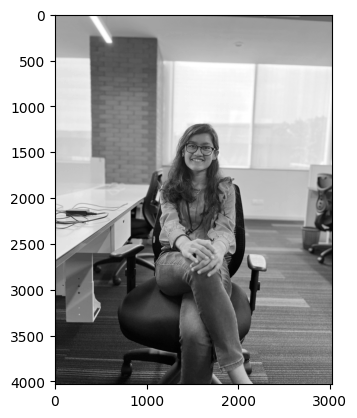

In [169]:
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat,cmap = 'gray')

In [173]:
U, D, VT = np.linalg.svd(imgmat)

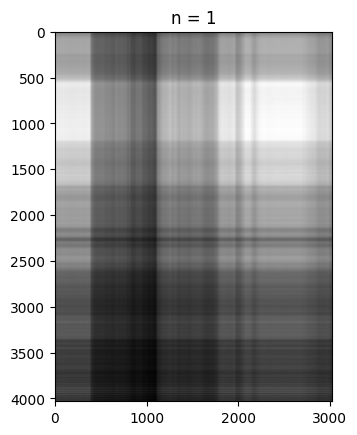

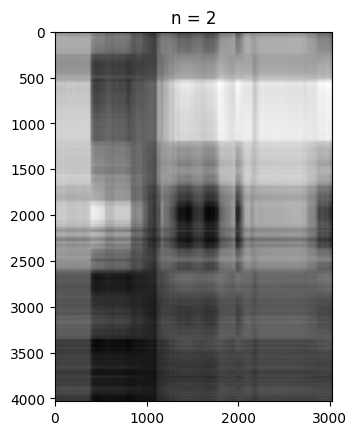

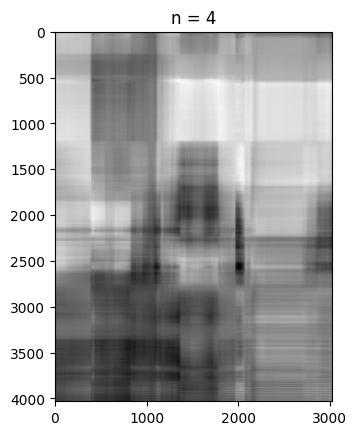

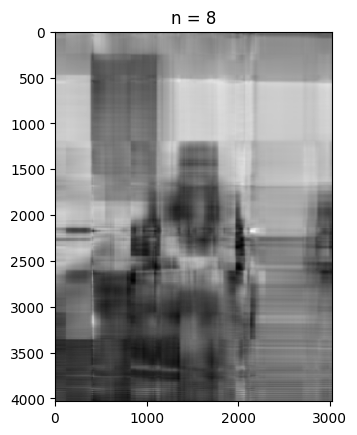

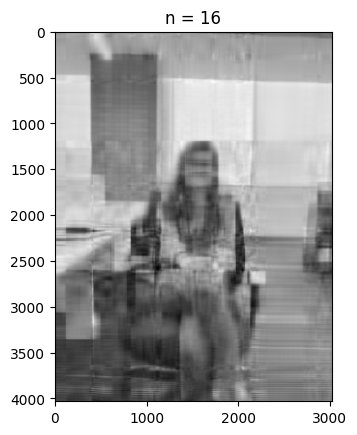

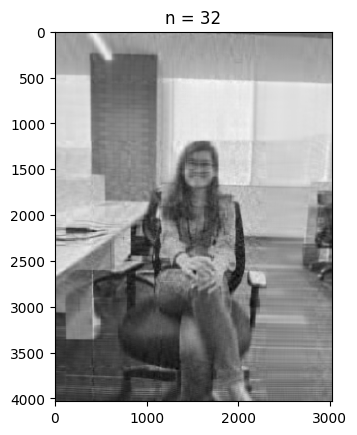

In [176]:
for i in [1,2,4,8,16,32]:
    reconstructimg = np.matrix(U[:,:i])*np.diag(D[:i])*np.matrix(VT[:i,:])
    plt.imshow(reconstructimg,cmap = 'gray')
    title = 'n = %s' %i
    plt.title(title)
    plt.show()

In [177]:
full_rep = 4032*3024

final_rep = 32*4032 + 32 + 32*3024

In [179]:
(final_rep/full_rep)*100

1.8521143025111277

In [26]:
A_pca = np.array([[4,2,0.6],[4.2,2.1,0.59],[3.9,2.0,0.58],[4.3,2.1,0.62],[4.1,2.2,0.63]])
A_pca.shape

(5, 3)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)

In [7]:
principalcomponents = pca.fit_transform(A_pca)
principalcomponents

array([[-0.12130139, -0.03953228],
       [ 0.09943512, -0.01873667],
       [-0.21650871, -0.007775  ],
       [ 0.19540768, -0.04889336],
       [ 0.0429673 ,  0.11493731]])

In [31]:
cov_matrix = np.cov(A_pca)

In [32]:
cov_matrix

array([[2.92      , 3.098     , 2.846     , 3.164     , 2.966     ],
       [3.098     , 3.28703333, 3.0199    , 3.3566    , 3.1479    ],
       [2.846     , 3.0199    , 2.7748    , 3.0832    , 2.8933    ],
       [3.164     , 3.3566    , 3.0832    , 3.4288    , 3.2122    ],
       [2.966     , 3.1479    , 2.8933    , 3.2122    , 3.0193    ]])

In [33]:
eigval,eigvec = np.linalg.eig(cov_matrix)
eigvec.real

array([[-0.43507609, -0.86365318, -0.25458199,  0.00876025,  0.00876025],
       [-0.46163766,  0.26087558, -0.09607325,  0.62435324,  0.62435324],
       [-0.42413976,  0.17138569,  0.14343226, -0.19245499, -0.19245499],
       [-0.47137204,  0.39572251, -0.53689696, -0.33734958, -0.33734958],
       [-0.44216889, -0.00881827,  0.78557417, -0.11622565, -0.11622565]])

In [34]:
eigval.real

array([ 1.54239033e+01,  9.29623555e-16,  6.03004516e-03, -1.58768496e-16,
       -1.58768496e-16])

In [14]:
result = np.dot(A_pca,eigvec[:,:2])
result

array([[ 4.47594928, -0.54395965],
       [ 4.69668579, -0.56475525],
       [ 4.38074197, -0.57571693],
       [ 4.79265835, -0.53459857],
       [ 4.64021798, -0.69842923]])